# 1.Data preprocessing

#### The first step of training a neural network is always data preprocessing. In practical application, the quantity and quality of data will directly affect the accuracy of the neural network.

训练一个神经网络的第一步是永远是数据的预处理，在实际应用中，数据的数量和质量会直接影响神经网络的准确率。

In [1]:
import os
import cv2 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#import tensorflow as tf

### 1.1 Show the original image and its label

#### The original image is an aerial image, it has a very large size, about 20000x16000. The image contains corn and tobacco crops. Our goal is to classify corn and tobacco, so we set the classification as background/corn/tobacco.

原始图像是一幅无人机航拍影像，它的尺寸非常大。图像中包含玉米和烟草作物，我们的目标就是将玉米和烟草分类，因此我们将分类类别设置为背景/玉米/烟草三类。

#### In the image segmentation task, the task of the neural network model is to determine the category of each pixel of the image, such as corn field, tobacco, or other.Therefore, the semantic segmentation label is a mask of the same size as the original image, with only three pixel values: 0 for background, 1 for corn, and 2 for tobacco.We can see the original image on the left and its label on the right. The label is used to tell the computer which category each pixel of the original image belongs to, so that the computer can learn the correct answer.

在图像分割任务中，神经网络模型的任务是判断图像的每一个像素点所属的类别，比如玉米地，烟草，或者其它。因此语义分割的标签是一张与原图尺寸相同的掩膜，掩膜只有三个像素值：0 表示背景，1 表示玉米，2 表示烟草。我们可以看到左侧为原始图像，右侧为他的标签，标签的作用是告诉计算机原始图像的每一个像素点所属的类别，让计算机学习正确的答案。

image  shape:(16471, 20808, 3), data_type:uint8, min_value:0, max_value:255
label  shape:(16471, 20808), data_type:uint8, min_value:0, max_value:2


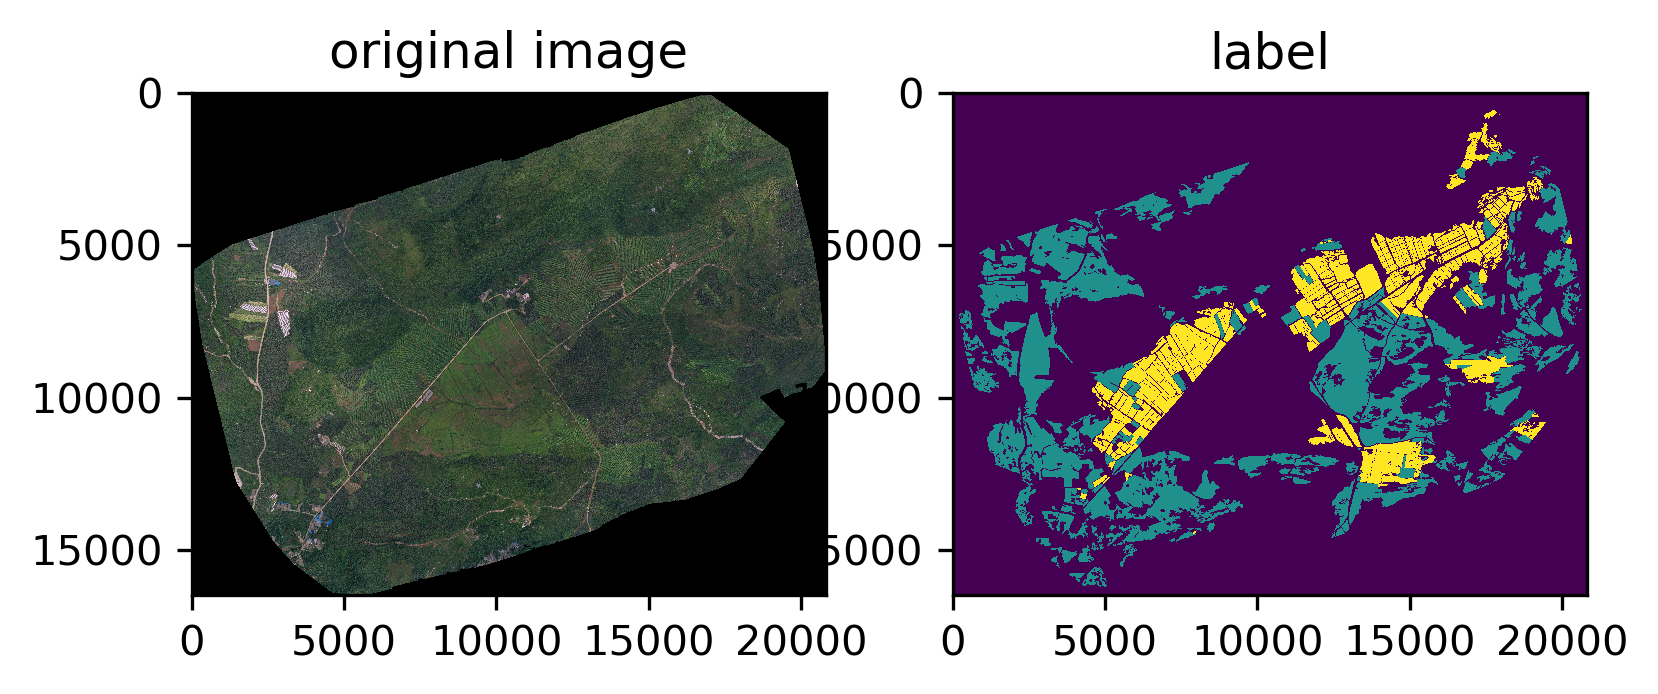

In [2]:
img_path = "./dataset/image/corn_baccy.tif"
label_path = "./dataset/label/corn_baccy.tif"
img = cv2.imread(img_path)
label = cv2.imread(label_path, cv2.IMREAD_UNCHANGED)
print ('image  shape:{}, data_type:{}, min_value:{}, max_value:{}'.format(img.shape, img.dtype, img.min(), img.max()))
print ('label  shape:{}, data_type:{}, min_value:{}, max_value:{}'.format(label.shape, label.dtype, label.min(), label.max()))

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=300)
axes = ax.flatten()
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('original image')
axes[1].imshow(label)
axes[1].set_title('label')
plt.show()

### 1.2 Crop the image and label

#### The original image was too large to be used directly for training, so we used a sliding window to crop the original image into a number of smaller images with a size of 512x512.

原始图像非常大，不能直接用于训练，所以我们使用滑动窗口的方式将原图裁剪为512x512的小图.

In [3]:
from utils import split_img_and_mask

img_path = "./dataset/image/corn_baccy.tif"
label_path = "./dataset/label/corn_baccy.tif"
img = cv2.imread(img_path)
label = cv2.imread(label_path, cv2.IMREAD_UNCHANGED)

split_save_dir = './dataset/split_512/'
split_size = 512

split_img_and_mask(img, label, split_size, split_save_dir)

makedir:  ./dataset/split_512/image
makedir:  ./dataset/split_512/label
   1 write: img_0_5632.png
   2 write: img_0_6144.png
   3 write: img_0_6656.png
   4 write: img_512_5120.png
   5 write: img_512_5632.png
   6 write: img_512_6144.png
   7 write: img_512_6656.png
   8 write: img_512_7168.png
   9 write: img_512_7680.png
  10 write: img_512_8192.png
  11 write: img_512_8704.png
  12 write: img_512_9216.png
  13 write: img_1024_5120.png
  14 write: img_1024_5632.png
  15 write: img_1024_6144.png
  16 write: img_1024_6656.png
  17 write: img_1024_7168.png
  18 write: img_1024_7680.png
  19 write: img_1024_8192.png
  20 write: img_1024_8704.png
  21 write: img_1024_9216.png
  22 write: img_1024_9728.png
  23 write: img_1024_10240.png
  24 write: img_1024_10752.png
  25 write: img_1024_11264.png
  26 write: img_1536_5120.png
  27 write: img_1536_5632.png
  28 write: img_1536_6144.png
  29 write: img_1536_6656.png
  30 write: img_1536_7168.png
  31 write: img_1536_7680.png
  32 write: i

 273 write: img_7168_3584.png
 274 write: img_7168_4096.png
 275 write: img_7168_4608.png
 276 write: img_7168_5120.png
 277 write: img_7168_5632.png
 278 write: img_7168_6144.png
 279 write: img_7168_6656.png
 280 write: img_7168_7168.png
 281 write: img_7168_7680.png
 282 write: img_7168_8192.png
 283 write: img_7168_8704.png
 284 write: img_7168_9216.png
 285 write: img_7168_9728.png
 286 write: img_7168_10240.png
 287 write: img_7168_10752.png
 288 write: img_7168_11264.png
 289 write: img_7168_11776.png
 290 write: img_7168_12288.png
 291 write: img_7168_12800.png
 292 write: img_7168_13312.png
 293 write: img_7168_13824.png
 294 write: img_7168_14336.png
 295 write: img_7168_14848.png
 296 write: img_7168_15360.png
 297 write: img_7680_3072.png
 298 write: img_7680_3584.png
 299 write: img_7680_4096.png
 300 write: img_7680_4608.png
 301 write: img_7680_5120.png
 302 write: img_7680_5632.png
 303 write: img_7680_6144.png
 304 write: img_7680_6656.png
 305 write: img_7680_7168.png

 544 write: img_12288_10752.png
 545 write: img_12288_11264.png
 546 write: img_12288_11776.png
 547 write: img_12288_12288.png
 548 write: img_12288_12800.png
 549 write: img_12288_13312.png
 550 write: img_12288_13824.png
 551 write: img_12800_1536.png
 552 write: img_12800_2048.png
 553 write: img_12800_2560.png
 554 write: img_12800_3072.png
 555 write: img_12800_3584.png
 556 write: img_12800_4096.png
 557 write: img_12800_4608.png
 558 write: img_12800_5120.png
 559 write: img_12800_5632.png
 560 write: img_12800_6144.png
 561 write: img_12800_6656.png
 562 write: img_12800_7168.png
 563 write: img_12800_7680.png
 564 write: img_12800_8192.png
 565 write: img_12800_8704.png
 566 write: img_12800_9216.png
 567 write: img_12800_9728.png
 568 write: img_12800_10240.png
 569 write: img_12800_10752.png
 570 write: img_12800_11264.png
 571 write: img_12800_11776.png
 572 write: img_12800_12288.png
 573 write: img_12800_12800.png
 574 write: img_12800_13312.png
 575 write: img_12800_138

 818 write: img_17920_9216.png
 819 write: img_17920_9728.png
 820 write: img_17920_10240.png
 821 write: img_17920_10752.png
 822 write: img_17920_11264.png
 823 write: img_17920_11776.png
 824 write: img_18432_1536.png
 825 write: img_18432_2048.png
 826 write: img_18432_2560.png
 827 write: img_18432_3072.png
 828 write: img_18432_3584.png
 829 write: img_18432_4096.png
 830 write: img_18432_4608.png
 831 write: img_18432_5120.png
 832 write: img_18432_5632.png
 833 write: img_18432_6144.png
 834 write: img_18432_6656.png
 835 write: img_18432_7168.png
 836 write: img_18432_7680.png
 837 write: img_18432_8192.png
 838 write: img_18432_8704.png
 839 write: img_18432_9216.png
 840 write: img_18432_9728.png
 841 write: img_18432_10240.png
 842 write: img_18432_10752.png
 843 write: img_18432_11264.png
 844 write: img_18944_1536.png
 845 write: img_18944_2048.png
 846 write: img_18944_2560.png
 847 write: img_18944_3072.png
 848 write: img_18944_3584.png
 849 write: img_18944_4096.png
 

### 1.3 Training set and validation set

#### By dividing all the data into training set and validation set, our task is to train a network through the training set, and then use the validation set to judge the accuracy of the network. In this example, we divide all the data (884 in total) into training and validation set on a 7:3 ratio. It takes about two minutes.

将所有数据划分为训练集和验证集，我们任务是通过训练集来训练一个网络，然后用验证集来判断网络的好坏。在本例中，我们按7：3的比例划分训练集和验证集。

In [4]:
from utils import apportion

src_dir = './dataset/split_512/'
apport_dir = './dataset/split_512/apport/'
# train/valid 分配比例
apport_rate = {'train':0.70,'valid':0.30}
random_seed = 7

apportion(src_dir, apport_dir, apport_rate, seed=random_seed)

train:618 | valid:265 
train_corn: 59.31%, train_baccy: 26.66%
valid_corn: 60.33%, valid_baccy: 26.40%
done!


# 2.Construct deep convolution neural network

#### In this example, we will build a network called Unet. Many segmentation networks are based on full convolution network (FCN), including Unet.Unet is a typical encoder-decoder structure, which consists of two parts. The first part is feature extraction, the second part is up-sampling, and skip connection is added in the middle. Due to the U-shaped network structure, it is called Unet.

在本例中我们将搭建一个叫做Unet的网络，很多分割网络都是基于全卷积网络（FCNs）做改进，包括Unet。Unet是典型的编码器-解码器结构，包括两部分，第一部分是特征提取，第二部分是上采样部分，中间加入跳连结构，由于网络结构像U型，所以叫Unet网络。

![jupyter](./backup/Unet.png)

### 2.1 Using Keras

#### Building a deep learning project from 0 is very complicated, and usually we use an integration framework, Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Keras offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

从0开始搭建一个深度学习工程是非常复杂的，通常我们使用集成框架。Keras 是一个用 Python 编写的高级神经网络 API，它能够以 TensorFlow, CNTK, 或者 Theano 作为后端运行。Keras 的开发重点是支持快速的实验。Keras提供一致且简单的 API，将常见用例所需的用户操作数量降至最低，并且在用户错误时提供清晰和可操作的反馈。

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,\
                                    BatchNormalization, Reshape, Activation, concatenate
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.preprocessing.image import img_to_array  
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import multi_gpu_model, plot_model
from tensorflow.keras.models import Model, load_model

### 2.2 Build Unet

In [6]:
def unet(input_shape, n_label):
    inputs = Input(input_shape)
    #(512 512)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    skip1 = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(skip1)
    #(256 256)
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    skip2 = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(skip2)
    #(128 128)
    x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    skip3 = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(skip3)
    #(64 64)
    x = Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    skip4 = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(skip4)
    #(32 32)
    x = Conv2D(512, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    #(64 64)
    x = concatenate([UpSampling2D(size=(2, 2))(x), skip4], axis=3)
    x = Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    # (128 128)
    x = concatenate([UpSampling2D(size=(2, 2))(x), skip3], axis=3)
    x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    #(256 256)
    x = concatenate([UpSampling2D(size=(2, 2))(x), skip2], axis=3)
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    #(512 512)
    x = concatenate([UpSampling2D(size=(2, 2))(x), skip1], axis=3)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(n_label, (1, 1))(x)
    x = Reshape((-1, n_label))(x)
    y = Activation('softmax')(x)

    model = Model(inputs=inputs, outputs=y)
    return model

#### With keras, we can easily visualize the network structure to check for coding errors. By using 'summary()' we can check the input and output of each layer, and we can see that the number of Unet parameters is quite large, about 7,858,000 trainable parameters.

使用keras我们可以很方便的对网络结构进行可视化，从而检验是否有编码错误，通过使用 'summary()' 我们可以检查每一层的输入和输出，并且可以看到Unet的参数量是相当大的，约有7,858,000的可训练参数。

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 9248        batch_normalization[0][0]        
______________________________________________________________________________________________

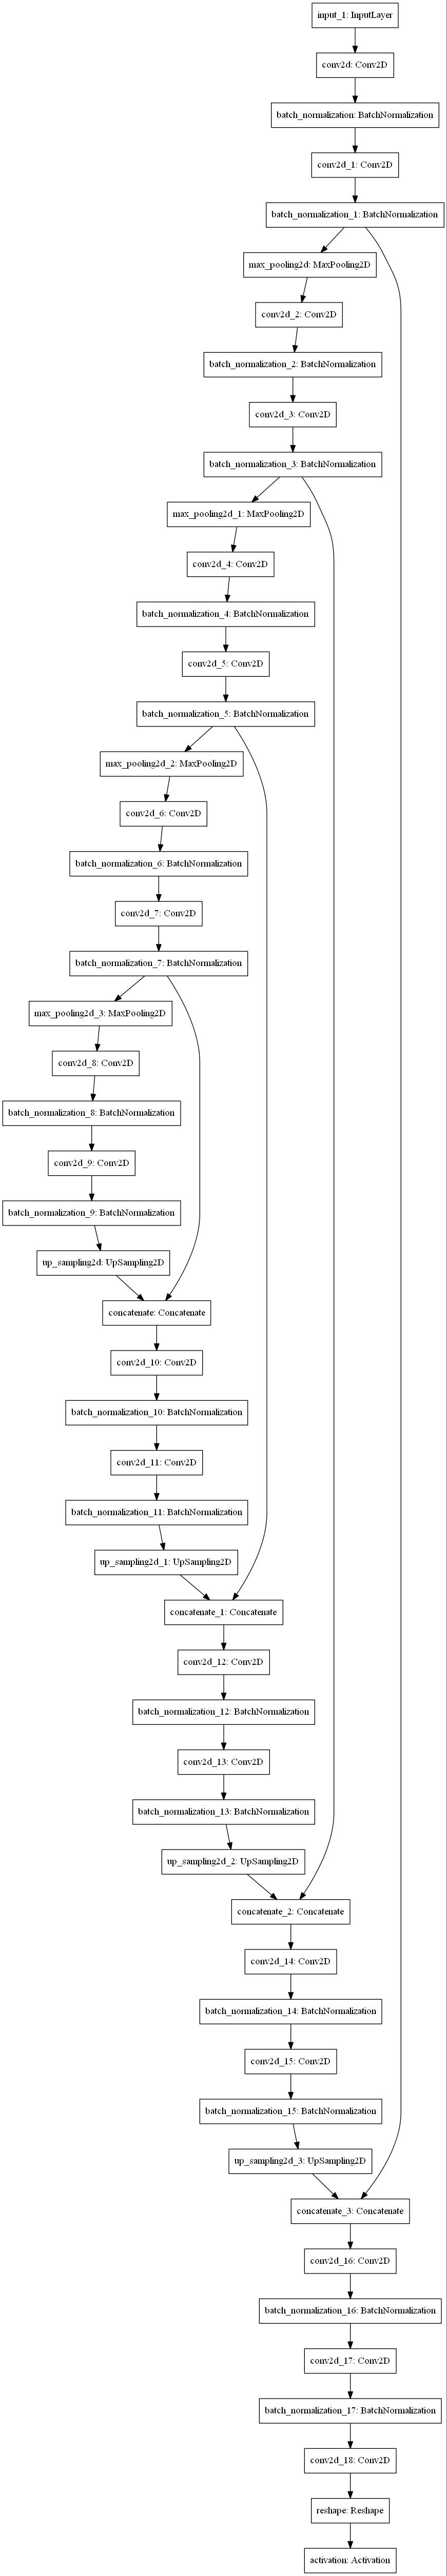

In [7]:
unet_model = unet(input_shape=(512, 512, 1), n_label=3)
unet_model.summary()
plot_model(unet_model, to_file='unet_model.jpg')

# 3.Training model

#### The training of the model has a slightly complicated configuration process, which is not detailed due to limited time.In a word, it is to use the previously divided training set for continuous iteration training, and use the validation set for performance evaluation after the completion of each iteration. The number of iterations is determined by 'epochs', 'batch_size' and other parameters, and finally saved in the file named 'unet.h5'.We will do a short training session as a demonstration, then break the session, the full session is usually on a server with better performance, which takes about 1 hour.

模型的训练有一个稍微复杂的配置过程，由于时间有限，不详细展开说明。简而言之，就是使用前面划分好的训练集不断的迭代训练，在每一轮的迭代完成后使用验证机进行性能评估，迭代的次数通过epochs和batch_size等参数进行确定，最终保存到名为 "Unet.h5" 文件中。我们会进行短暂的训练作为演示，然后中断训练，完整的训练通常在性能更好的服务器上进行，大约花费一个小时。

#### During the training, we can observe that although there is slight jitter, the overall trend of evaluation indicators 'acc'(Accuracy) and 'miou'(mean Intersection over Union) is increasing.

在训练中我们可以观察到，虽然有轻微的抖动，但是评估指标"acc"(Accuracy) 和 "miou"(mean Intersection over Union)的总体趋势是增加的。

In [8]:
from unet_train import train

args = dict(
    model=unet_model,
    epochs=30,
    batch_size=1,
    gpus=1,      # You use multiple gpus to speed up model training
    train_dir='./dataset/split_512/apport/train/',
    valid_dir='./dataset/split_512/apport/valid/',
    save_path='./Unet.h5',   # the save path of model during training
)

train(args)

the number of train data is 619
the number of val data is 265
Epoch 1/30
618/619 [============================>.] - ETA: 0s - loss: 0.8201 - acc: 0.6542 - miou: 0.6059
Epoch 00001: val_miou improved from inf to 0.83250, saving model to ./Unet.h5
619/619 [==============================] - 139s 224ms/step - loss: 0.8193 - acc: 0.6547 - miou: 0.6074 - val_loss: 0.8516 - val_acc: 0.6687 - val_miou: 0.8325
Epoch 2/30
103/619 [===>..........................] - ETA: 1:34 - loss: 0.6686 - acc: 0.7564 - miou: 0.8906

KeyboardInterrupt: 

# 4.Model inference

#### After the model is trained, it can be deployed. We have prepared an Unet model in advance. Next, we check the training effect of the model by loading the pre-trained model and making prediction (also called inference) on the pictures in the validation set.

在模型训练好之后就可以进行部署，我们已经预先好了一个Unet模型，接下来通过加载预训练的模型，对验证集中的图片进行预测（也称之为推理），检查模型的训练效果。

In [9]:
from tensorflow.keras.models import load_model

model = load_model('./backup/pretrain.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 512, 512, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 32) 9248        batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [14]:
img_path = './dataset/split_512/test_image/img_18944_3072.png'

#preprocessing
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
image = image.astype('float') / 255.0
image = image.reshape(1, 512, 512, 1)

pred = model.predict(image)

#### The output of the model is a probability graph (pred) of the same size as the input image, with 3 probability values for each pixel position, indicating the probability that the pixel is considered by the model to belong to the corresponding category. In the following code, the output is the probability distribution at the pixel coordinate of (128,128).

模型的输出是一张尺寸与输入图片相同的概率图，在每一个像素位置对应有3个概率值，表示模型认为该像素属于对应类别的概率。在下边代码中，输出的是像素坐标为(128,128)处的概率分布。

[0.994341   0.00352143 0.00213759]
—— At position (256,256), the probability of background/corn/tobacco is [0.994341   0.00352143 0.00213759]


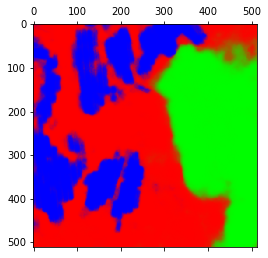

In [15]:
pred = pred.reshape((512, 512, 3))

y,x = (256, 256)
print(pred[y, x])
print('—— At position ({},{}), the probability of background/corn/tobacco is {}'.format(y, x, pred[y, x]))
plt.matshow(pred)

#### With the argmax() operation, we can get the category with the highest probability, which is the prediction result.

通过argmax()操作，我们可以得到概率最大的类别，即为预测结果。

mask.shape: (512, 512)
—— At position (256,256), the predicted value is 0, indicating the category is background.


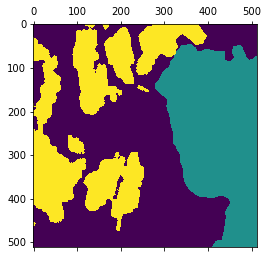

In [16]:
mask = np.argmax(pred, axis=2).astype(np.uint8)  # 得到的mask.shape = (h,w), 内容为classes = [0. ,  1., ...]

classes = ['background','corn','tobacco']
print('mask.shape:',mask.shape)
print('—— At position ({},{}), the predicted value is {}, indicating the category is {}.'.format(y, x, mask[y, x], classes[mask[y, x]]))
plt.matshow(mask)

#### Render the mask to the original image.

将掩膜渲染到原始图片。

C:\Users\cxyth\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


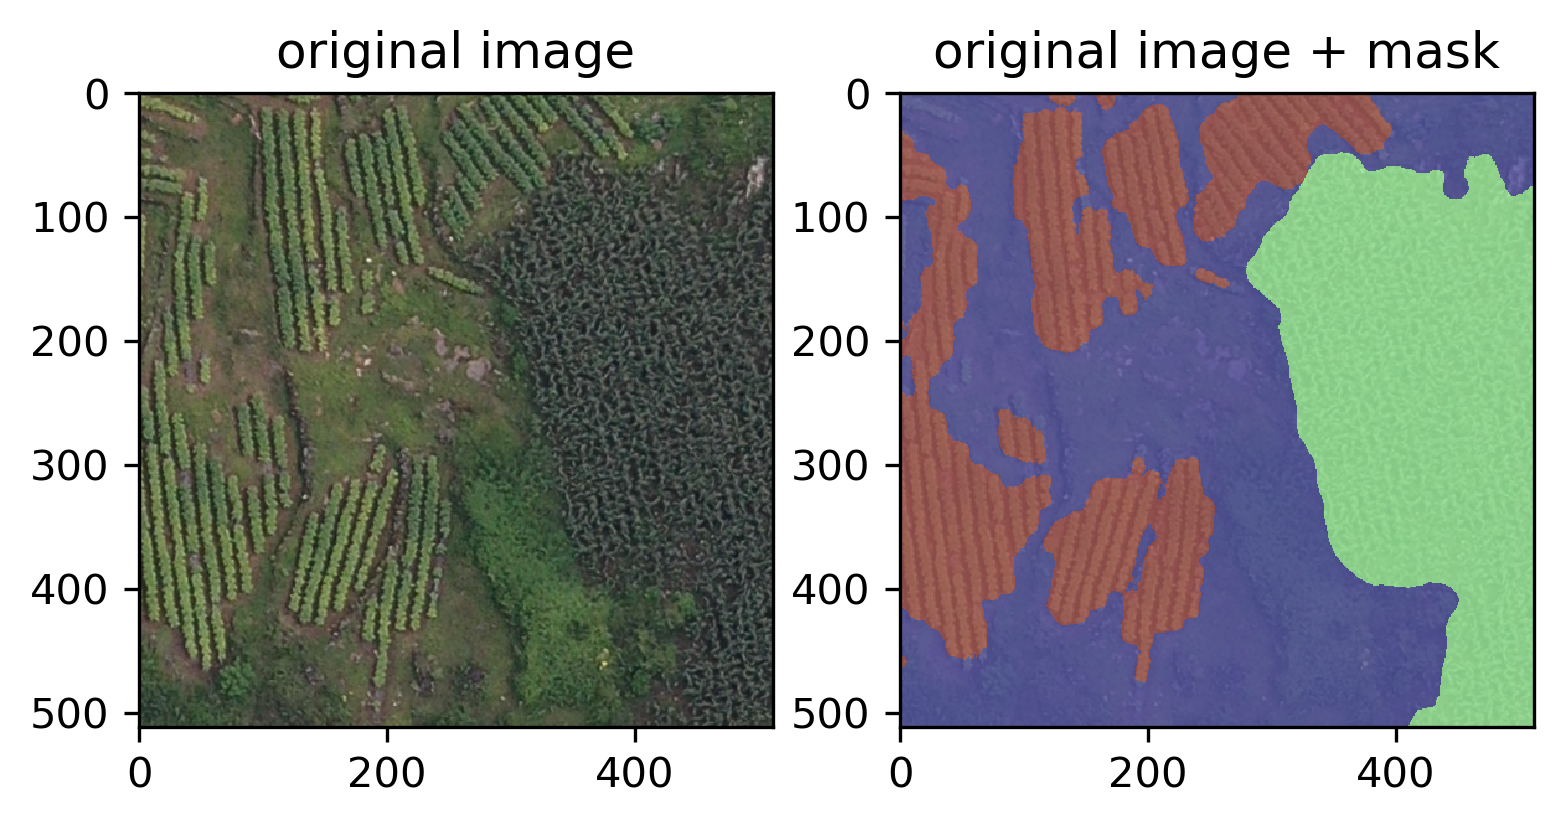

In [17]:
src_img = cv2.imread(img_path)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=300)
axes = ax.flatten()
axes[0].imshow(src_img)
axes[0].set_title('original image')
axes[1].imshow(src_img, alpha=0.5)
axes[1].imshow(mask, alpha=0.5, cmap='jet')
axes[1].set_title('original image + mask')
plt.show()